In [1]:
import this
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt
from scipy.integrate import odeint

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [77]:
a = 5
type(a)

int

In [78]:
li = []
for i in range(10):
    li.append(f"texfile{i:02}.txt")
    
li


['texfile00.txt',
 'texfile01.txt',
 'texfile02.txt',
 'texfile03.txt',
 'texfile04.txt',
 'texfile05.txt',
 'texfile06.txt',
 'texfile07.txt',
 'texfile08.txt',
 'texfile09.txt']

In [79]:
filenames = [f'basename{i+1:03}.txt' for i in range(10)]
print(filenames)

['basename001.txt', 'basename002.txt', 'basename003.txt', 'basename004.txt', 'basename005.txt', 'basename006.txt', 'basename007.txt', 'basename008.txt', 'basename009.txt', 'basename010.txt']


In [80]:
from os import listdir
files = listdir("f://Alexei Almacen//Basurero//")
filescopy = []
for f in files:
    a = f.rsplit('.', maxsplit=1)
    if a[-1] == 'txt':
        filescopy.append(f)
        
filescopy

['1_año-luz.txt',
 'Contactos de los Dedieu.txt',
 'Libros cristianos a leer.txt',
 'Links de libros.txt',
 'Links referencias bibliograficas 1.txt',
 'Links referencias bibliograficas.txt',
 'Notas.txt',
 'Números de Carnet de Identidad.txt',
 'Repaso Ingles.txt',
 'Serie y modelo de la PC.txt',
 'Telefonos y correos.txt',
 'Vocabulario en ingles.txt']

In [81]:
def pattern(n):
    n-=1
    for i in range(n):
        inicio = (n-i)*" "
        cad = 2*i*str(0)
        print(f'{inicio}I{cad}I')
    for i in range(n,-1,-1):
        final = (n-i)*" "
        cad = 2*i*str(0)
        print(f'{final}I{cad}I')
    
pattern(1)

II


In [82]:
def palindromesume():
    palindromes = []
    suma = 0
    for i in range(101,1000):
        s = str(i)
        pal = True
        for j in range(len(s)):
            if(s[j] != s[len(s)-j-1]):
                pal = False
        if pal == True:
            palindromes.append(i)
    for k in palindromes:
        suma += k
    return suma

palindromesume()

49500

In [83]:
from random import randrange

with open("aleatorios.txt", "w") as pf:
    for i in range(10):
        for j in range(3):
            pf.write(str(randrange(1,100)) + ',')
        pf.write(str(randrange(1,100)))
        pf.write('\n')
            

!type aleatorios.txt
print()

cont = []
with open('aleatorios.txt', 'r') as pf:
    cont = pf.read().split('\n')
    result = [cont[i].split(',') for i in range(len(cont)-1)]
    
form = [[int(result[j][i]) for i in range(len(result[j]))] for j in range(len(result))]
    
form

68,74,87,10
27,99,68,86
67,74,83,84
14,9,15,17
69,27,83,1
60,40,11,28
88,5,98,98
67,47,22,50
65,1,8,80
78,78,30,30



[[68, 74, 87, 10],
 [27, 99, 68, 86],
 [67, 74, 83, 84],
 [14, 9, 15, 17],
 [69, 27, 83, 1],
 [60, 40, 11, 28],
 [88, 5, 98, 98],
 [67, 47, 22, 50],
 [65, 1, 8, 80],
 [78, 78, 30, 30]]

In [84]:
d = {'a':1, 'b':2}
d['c'] = 5
locals().update(d)
print(a,b,c)
for item in d:
    print(item, d[item])
print(d.keys())
print(d.values())
print(type(d.values()))

1 2 5
a 1
b 2
c 5
dict_keys(['a', 'b', 'c'])
dict_values([1, 2, 5])
<class 'dict_values'>


In [85]:
b = np.linspace(0,1,10)
b

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

# Computing integral
$$ \int_{0}^{\pi} \sin x dx $$

In [86]:
a, b, n = 0, np.pi/2, 1572
x = np.linspace(a,b,n)
integral = (b - a)/(2*(n - 1)) * np.sum(np.sin(x[:-1]) + np.sin(x[1:]))

analytical = 1.0
print(integral - analytical)
integral

-8.33117287379892e-08


0.9999999166882713

In [87]:
x = np.linspace(0,np.pi/0.001)
len(x)

50

In [88]:
a, b, n = 0, np.pi/2, 40
x = np.linspace(a,b,n)
suma = sum([np.sin(x[i]) + np.sin(x[i+1]) for i in range(len(x)-1)])
integral = (b - a)/(2*(n - 1)) * suma
integral

0.9998648110993813

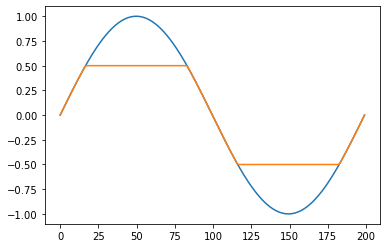

In [95]:
x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

plt.plot(y)

y[y > .5] = .5
y[y < -.5] = -.5

plt.plot(y)

In [172]:
def dphi_func(phi_vector, t):
    g = 10
    phi1, phi2, phi3, phi4 = phi_vector
    A = np.array([[4/3, 1/2*np.cos(phi1-phi2)], 
                  [1/2*np.cos(phi1-phi2), 1/3]])
    b = np.array([-1/2*phi4**2*np.sin(phi1-phi2)-3/2*g*np.sin(phi1), 
                  1/2*phi3**2*np.sin(phi1-phi2)-1/2*g*np.sin(phi2)])
    dphi = np.linalg.solve(A,b)
    return np.array([phi3, phi4, dphi[0], dphi[1]])

t = np.linspace(0,10,1000)
initial_phi = [np.pi/6, 0]
initial_dphi = [0, 0]
initial = initial_phi + initial_dphi
print(initial)
result = odeint(dphi_func, initial, t)

print(result.shape)
print(type(result))
print(result[-5:,[-2,-1]])
print(t[-5:])

[0.5235987755982988, 0, 0, 0]
(1000, 4)
<class 'numpy.ndarray'>
[[-1.7749268   0.72209374]
 [-1.84072779  0.88553162]
 [-1.9047465   1.0466551 ]
 [-1.96643185  1.20411388]
 [-2.02505315  1.35621493]]
[ 9.95995996  9.96996997  9.97997998  9.98998999 10.        ]


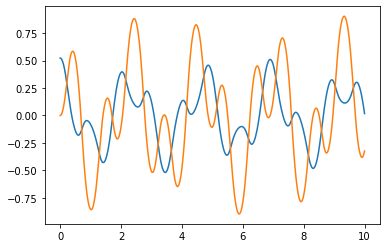

In [173]:
plt.plot(t, result[:,0])
plt.plot(t, result[:,1])

In [169]:
l = 1.

position_bar1 = np.array([l*np.sin(result[:,0]), l*np.cos(result[:,0])])
position_bar2 = position_bar1 + np.array([l*np.sin(result[:,1]), l*np.cos(result[:,1])])

print(f"Initial position barra 1: {position_bar1[0,0]:4.1f}i + {position_bar1[1,0]:4.1f}j")
print(f"Initial position barra 1: {position_bar2[0,0]:4.1f}i + {position_bar2[1,0]:4.1f}j")

Initial position barra 1:  1.0i +  0.0j
Initial position barra 1:  1.0i +  1.0j


In [6]:
N = 128
x = np.arange(N)
y = np.sin(2*np.pi*x/N)

yk = fft(y)
yi = ifft(yk)
print(yk[:5])
print(yi[:5].real)
print(y[:5])
print(y[:5] - yi[:5].real)

[ 4.83287163e-16+0.00000000e+00j -7.54708116e-15-6.40000000e+01j
 -6.44871263e-16-3.56412791e-15j  2.91971113e-16-8.45775709e-16j
  3.68204484e-16-1.59891010e-15j]
[2.46519033e-32 4.90676743e-02 9.80171403e-02 1.46730474e-01
 1.95090322e-01]
[0.         0.04906767 0.09801714 0.14673047 0.19509032]
[-2.46519033e-32 -2.08166817e-17  2.77555756e-17  0.00000000e+00
  0.00000000e+00]


Text(0.5, 1.0, 'Absolute Values')

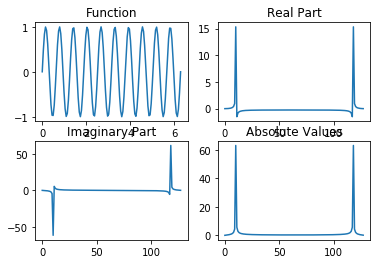

In [47]:
N = 128
x = np.linspace(0, 2*np.pi, N, endpoint=True)
y = np.sin(10*x)

yk = fft(y)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1, autoscale_on=True)
ax1.plot(x, y)
ax1.set_title('Function')
ax2 = fig.add_subplot(2,2,2, autoscale_on=True)
ax2.plot(yk.real)
ax2.set_title('Real Part')
ax3 = fig.add_subplot(2,2,3, autoscale_on=True)
ax3.plot(yk.imag)
ax3.set_title('Imaginary Part')
ax4 = fig.add_subplot(2,2,4, autoscale_on=True)
ax4.plot(abs(yk))
ax4.set_title('Absolute Values')